In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/heart_disease_train.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [ ]:
df.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [ ]:
#change ints to float
df.dtypes
for x in df:
    if df[x].dtypes == "int64":
        df[x] = df[x].astype(float)
        print (df[x].dtypes)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [ ]:
df.describe


<bound method NDFrame.describe of        age  sex  chest pain type  resting bp s  cholesterol  \
0     40.0  1.0              2.0         140.0        289.0   
1     49.0  0.0              3.0         160.0        180.0   
2     37.0  1.0              2.0         130.0        283.0   
3     48.0  0.0              4.0         138.0        214.0   
4     54.0  1.0              3.0         150.0        195.0   
...    ...  ...              ...           ...          ...   
1185  45.0  1.0              1.0         110.0        264.0   
1186  68.0  1.0              4.0         144.0        193.0   
1187  57.0  1.0              4.0         130.0        131.0   
1188  57.0  0.0              2.0         130.0        236.0   
1189  38.0  1.0              3.0         138.0        175.0   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                     0.0          0.0           172.0              0.0   
1                     0.0          0.0           156.0     

In [ ]:
df = df.select_dtypes(exclude=['object'])
df=df.fillna(df.mean())
X = df.drop('age',axis=1)
y = df['age']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
825,64.0,55.069
443,51.0,56.886
506,55.0,58.658
1152,42.0,51.149
364,56.0,50.507
...,...,...
564,55.0,58.006
54,52.0,55.608
621,74.0,66.815
529,49.0,53.611


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.327260504201681
Mean Squared Error: 48.68372193837535
Root Mean Squared Error: 6.977372137013716


In [ ]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', accuracy, '%.')

Mean Absolute Error: 5.33 degrees.
Accuracy: 89.26052664015621 %.


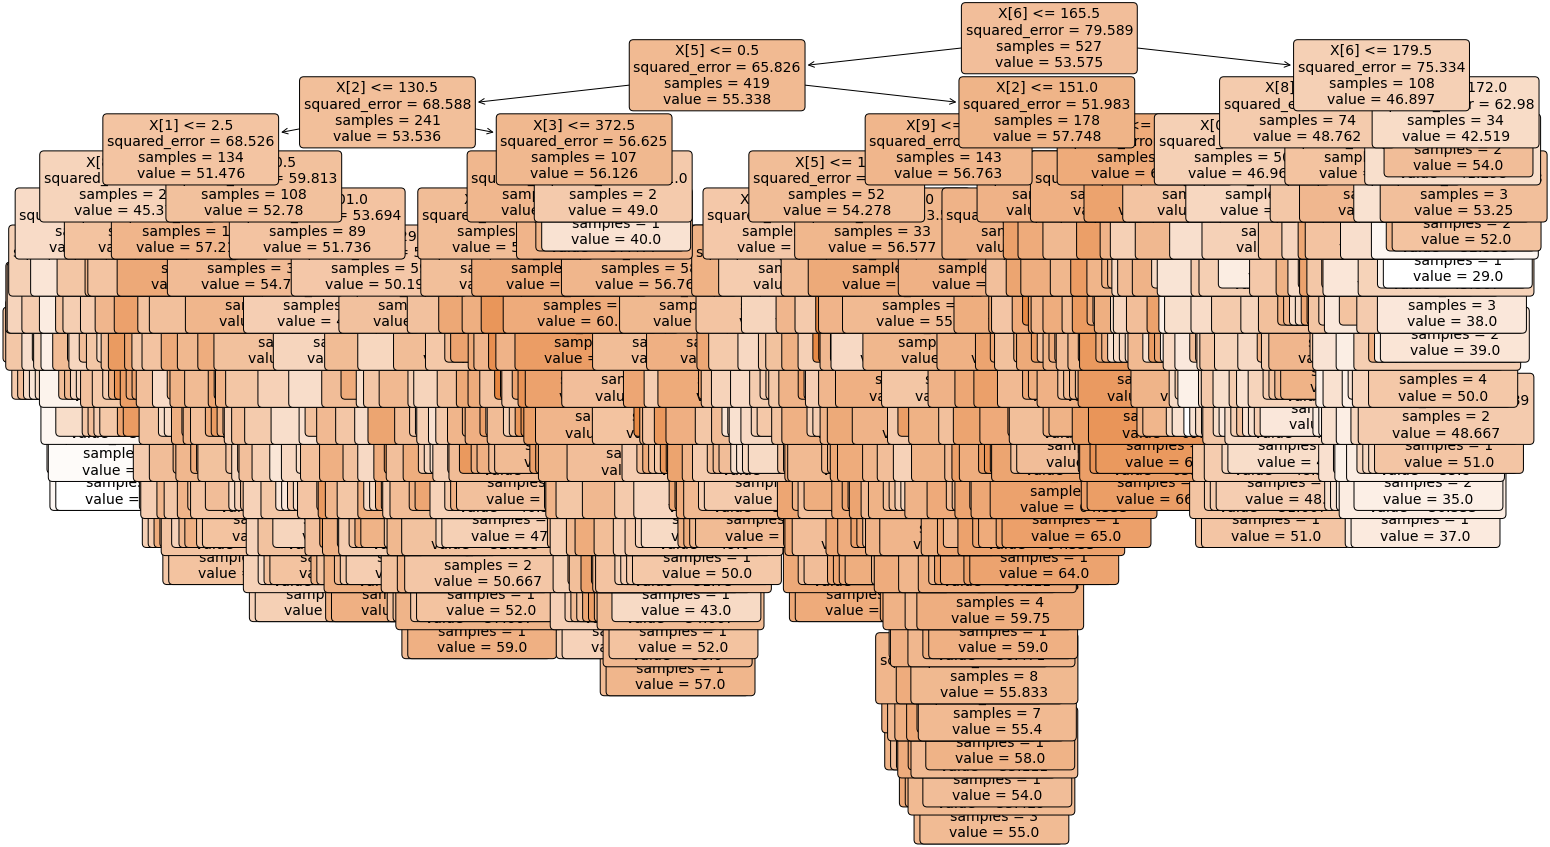

In [ ]:
import pydot
# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = y_pred > 0.5
cfm = confusion_matrix(y_test, y_pred)
print(cfm)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [3 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
